# Assigment 4 | Applied Machine Learning | Paras Ahuja

In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### 1. By using at least 4 classifiers and 5 different hyper-parameter settings for each, generate operating points and plot them on ROC. Do not hesitate to use/modify the ROC plot code in the module notebook. In case you do not see enough variety in Pd-Pf you might need to work on the classifiers set and/or hyper parameters. And do not hesitate to try hundreds if necessary, since the ROC is just a natural scatter plot. (Recommend linear SVM, RBF SVM, logistic regression, random forest, etc.)

In [2]:
# Read data into dataframe
df = pd.read_csv('assignment04_mushroom_dataset.csv', header=0)

Let's find out how many data instances, and features we have in our dataset.

In [3]:
# Print information about the dataset
print("Number of Examples: {}\nNumber of Features: {}".format(df.shape[0], df.shape[1]))

Number of Examples: 8124
Number of Features: 23


We have 8124 examples, and 23 features in our dataset. Let's see how our dataset looks like.

In [4]:
# Check what the dataset looks like
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


Let's find out how many classes we have. So far it appears that our class variable is divided in poisonous and edible.

In [5]:
df['class'].unique()

array(['p', 'e'], dtype=object)

Our initial expectation was correct. We only have two classes in this dataset.

In [6]:
# Get information on datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Let's find out if we have any missing values in our dataset. Since this is mostly a nominal dataset and one that is mostly alphabetical, there is suspicion that we may not see nan but instead see '?'.

In [7]:
# Check if values are '?'
print((df.astype(str) != '?').all(axis=0))

class                        True
cap-shape                    True
cap-surface                  True
cap-color                    True
bruises                      True
odor                         True
gill-attachment              True
gill-spacing                 True
gill-size                    True
gill-color                   True
stalk-shape                  True
stalk-root                  False
stalk-surface-above-ring     True
stalk-surface-below-ring     True
stalk-color-above-ring       True
stalk-color-below-ring       True
veil-type                    True
veil-color                   True
ring-number                  True
ring-type                    True
spore-print-color            True
population                   True
habitat                      True
dtype: bool


It appears that we have '?' values in stalk-root feature. Let's find out how many exactly.

In [8]:
# Count how many instances are marked with '?'
df.loc[df['stalk-root'] == '?'].count()

class                       2480
cap-shape                   2480
cap-surface                 2480
cap-color                   2480
bruises                     2480
odor                        2480
gill-attachment             2480
gill-spacing                2480
gill-size                   2480
gill-color                  2480
stalk-shape                 2480
stalk-root                  2480
stalk-surface-above-ring    2480
stalk-surface-below-ring    2480
stalk-color-above-ring      2480
stalk-color-below-ring      2480
veil-type                   2480
veil-color                  2480
ring-number                 2480
ring-type                   2480
spore-print-color           2480
population                  2480
habitat                     2480
dtype: int64

We have a total of 2480 missing values. We will have to drop these rows since there is no way to impute. We cannot average a + b if they are not variables, which these are not. Therefore, we will have to drop the missing rows.

In [9]:
# Drop all instances marked with '?'
df = df[(df != '?').all(axis=1)]

# Check the dataset
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


We need to check the size of our dataset again, to make sure that it still makes sense.

In [10]:
# Print information on modified dataset
print("Number of Examples: {}\nNumber of Features: {}".format(df.shape[0], df.shape[1]))

Number of Examples: 5644
Number of Features: 23


This makes sense. We had 8124 examples to begin with, we dropped 2480, which indeed leaves us with 5644 instances. We have the same number of columns as we did before. In order to make sense of this data, we will need to hot encode it so our classifiers can provide us with meaningful results. Let's do that.

In [11]:
# One hot encode the dataset
he = pd.get_dummies(df, columns=df.columns[1:])

# Check the dataset
he.head()

,class,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,...,population_n,population_s,population_v,population_y,habitat _d,habitat _g,habitat _l,habitat _m,habitat _p,habitat _u
0,p,0,0,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1
1,e,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2,e,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
3,p,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
4,e,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0


We will map the class to 1 for edible and 0 for poisonous.

In [12]:
he['class'] = he['class'].map({'p':0, 'e':1})

In [13]:
# Get y
y = he.iloc[:, 0]

# Get X
X = he.iloc[:, 1:]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.98, random_state=14, stratify=y)    

# Module 4 functions
def annot(opi, x, y):
    plt.annotate(f"OP{opi}", xy=(x, y), xytext=(.90*x+.1, .80*y), arrowprops=dict(facecolor='lightgray', shrink=1))

def collect_data_for_roc(classifier):
    FPR, TPR = [], []
    for c in classifier:
        pipe_lr = make_pipeline(StandardScaler(), c)
        pipe_lr.fit(X_train, y_train)
        y_pred = pipe_lr.predict(X_test)
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        TPR += [tp/(tp+fn)]
        FPR += [fp/(fp+tn)] 
                
    return FPR, TPR

def roc(FPR, TPR):
    FPR, TPR = zip(*sorted(zip(FPR, TPR)))
    fpr = [0.]+list(FPR)+[1.]; tpr = [0.]+list(TPR)+[1.]

    # Plot
    fig, ax = plt.subplots()
    plt.plot(fpr, tpr, ':', label='ROC')
    plt.scatter(FPR, TPR, 50, color='red', marker='o', label='operating points')
    plt.plot([0, 1], [0, 1], linestyle='--', color=(0.6, 0.6, 0.6), label='coin flip')

    # Annotate certain operating points
    for index, point in enumerate(random.sample(range(0, len(fpr)-1), k=4)):
        annot(index, fpr[point], tpr[point])

    # Labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.grid()
    plt.show()

    
svm_classifier = []
for c in range(100, 1100, 100):
    svm_classifier.append(SVC(C=c, gamma=0.001, kernel='rbf'))
    
logistic_regression_classifier = []
C = [2e-1, 0.5, 0.8, 1, 2, 5, 1e1, 2e1, 1e2]
for c in C:
    logistic_regression_classifier.append(LogisticRegression(random_state=14, penalty='l1', solver='liblinear', 
                                                                class_weight='balanced', C=c, multi_class='auto', max_iter=10000))
decision_tree_classifier = []
random_forest_classifier = []
for depth in range(2, 6):
    for leaf in range(5, 25, 5):
        decision_tree_classifier.append(DecisionTreeClassifier(max_depth=depth, min_samples_leaf=leaf))
        random_forest_classifier.append(RandomForestClassifier(n_estimators=500, max_depth=depth, min_samples_leaf=leaf))

Now that we have our code in order, we can simply see what the curves look like.

Decision Tree Classifier


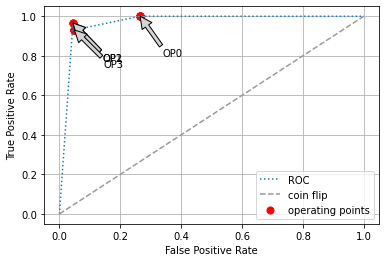

Random Forest Classifier


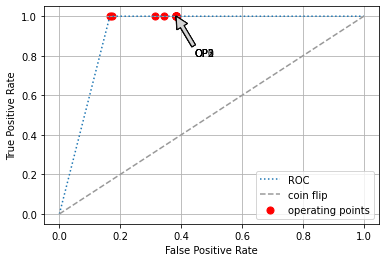

Logistic Regression Classifier


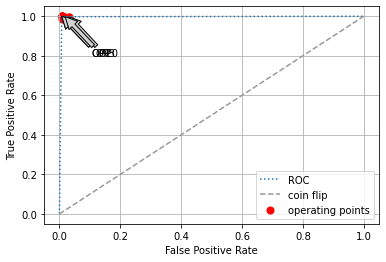

SVM Classifier


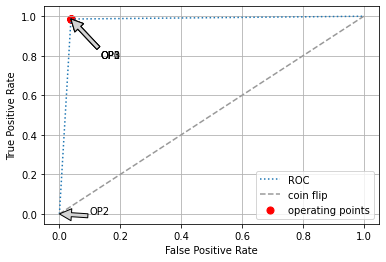

In [14]:
print("Decision Tree Classifier")        
roc(*collect_data_for_roc(decision_tree_classifier))
print("Random Forest Classifier")        
roc(*collect_data_for_roc(random_forest_classifier))
print("Logistic Regression Classifier")        
roc(*collect_data_for_roc(logistic_regression_classifier))
print("SVM Classifier")        
roc(*collect_data_for_roc(svm_classifier))

### 2. What kind of behavior would you expect to see in Pd – Pf interaction of an ROC plot? Do you see it in yours?

**Expectations:**

    1. "The best possible prediction method would yield a point in the upper left corner or coordinate (0,1) of the ROC space, representing zero false negatives and zero false positives, and perfect prediction." 
    
    2. "A random guess or a coin flip would result a point along the diagonal line (also called line of no-discrimination) from the left bottom to the top right corners (regardless of the positive and negative base rates)."
    
    We are expecting 1 and not 2.
    
We notice this behavior in Logistic Regression, and SVM classifiers. Decision Tree Classifier and Random Forest Classifier have a higher false positive rate as compared to the other classifiers used for demonstration. We are happy to note that that we did not have any points on the coin flip, which is saying that one can attain same or similar results by simply guessing or flipping a coin. Therefore, we do see the behaviour expected, more in some and less in others. Lastly, note that we only attain close to perfect performance from Logistic Regression, and SVM classifier - this not say that we have attained expectation 1 completely, but we have come very close to it.

### 3. From the ROC plot that you created make a selection of the classifier and hyper-parameter setting for this problem. Note that we are classifying mushrooms so your conclusion might be subjective but has to be supported by your findings.

In [15]:
def train_test(clf, X_train, X_test, y_train, y_test):
    rf = clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    TPR = tp/(tp+fn)
    FPR = fp/(fp+tn)
    return accuracy, TPR, FPR

#### Logistic Regression

In [16]:
lr = LogisticRegression(random_state=14, penalty='l1', solver='liblinear', class_weight='balanced', C=1000, multi_class='auto', max_iter=300)
accuracy, tpr, fpr = train_test(lr, X_train, X_test, y_train, y_test)
print("Accuracy: {}\nTPR: {}\nFPR: {}".format(accuracy, tpr, fpr))

Accuracy: 0.9927693420101229
TPR: 0.9953202690845276
FPR: 0.011358258400378608


We notice that the true positive rate with logistic regression with provided hyperparamters is 99.5%. We have an accuracy of 99.2%, although our focus is only on TPR, and FPR, it is still nice to see accuracy as a basic metric. We also note that the FPR rate is 1.1%

#### SVM

In [17]:
svm = SVC(C=10000, gamma=0.0001, kernel='rbf')
accuracy, tpr, fpr = train_test(svm, X_train, X_test, y_train, y_test)
print("Accuracy: {}\nTPR: {}\nFPR: {}".format(accuracy, tpr, fpr))

Accuracy: 0.9844540853217643
TPR: 0.9812810763381106
FPR: 0.010411736867013724


We notice that the true positive rate with SVM with provided hyperparamters is 98.1%, and false positive rate of 1.0%. We have an accuracy of 98.4%.

#### Random Forests

In [18]:
rf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_leaf=2)
accuracy, tpr, fpr = train_test(rf, X_train, X_test, y_train, y_test)
print("Accuracy: {}\nTPR: {}\nFPR: {}".format(accuracy, tpr, fpr))

Accuracy: 0.9920462762111352
TPR: 1.0
FPR: 0.02082347373402745


We notice that the true positive rate with Random Forests with provided hyperparamters is 100% and false positive rate is 1.2%. We have an accuracy of 99.51%.

#### Decision Tree

In [19]:
dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1)
accuracy, tpr, fpr = train_test(dt, X_train, X_test, y_train, y_test)
print("Accuracy: {}\nTPR: {}\nFPR: {}".format(accuracy, tpr, fpr))

Accuracy: 0.9797541576283442
TPR: 0.9719216145071659
FPR: 0.007572172266919072


We notice that the true positive rate with Decision Tree with provided hyperparamters is 96.9% and false positive rate is 3.8%. We have an accuracy of 96.6%.

Overall we attain the best performance from Random Forests, and Logistic Regression. 